#### Import required libraries, packages

In [1]:
# %matplotlib notebook
# for data analysis
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# find out current directory
%pwd

'C:\\Users\\Mir\\Dropbox\\Data_Vis'

#### Read a csv file as pandas dF

In [3]:
# load the dataset (ford.csv in current case)
dF = pd.read_csv('ford.csv')

In [4]:
print(type(dF)) # shows the datatype of the DataFrame
display(dF.head()) # shows the first few rows (5 if left empty) of the dataset
display(dF.tail()) # shows the last few rows (5 if left empty) of the dataset

<class 'pandas.core.frame.DataFrame'>


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
17959,Fiesta,2016,7999,Manual,31348,Petrol,54.3,1.2
17960,B-MAX,2017,8999,Manual,16700,Petrol,47.1,1.4
17961,B-MAX,2014,7499,Manual,40700,Petrol,57.7,1.0
17962,Focus,2015,9999,Manual,7010,Diesel,67.3,1.6
17963,KA,2018,8299,Manual,5007,Petrol,57.7,1.2


#### Check for missing values, data types of the columns

In [5]:
dF.info() # information on the dataset helps to find out anything unusual

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17964 non-null  object 
 1   year          17964 non-null  int64  
 2   price         17964 non-null  int64  
 3   transmission  17964 non-null  object 
 4   mileage       17964 non-null  int64  
 5   fuelType      17964 non-null  object 
 6   mpg           17964 non-null  float64
 7   engineSize    17964 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB


In [6]:
# find out no. of rows and no. of columns in the DataSet, also available from the previous operation

print("number of rows = ", dF.shape[0])
print("number of columns = ", dF.shape[1])

number of rows =  17964
number of columns =  8


#### Count the number of unique values present in the 'model' column

In [7]:
print("Number of total unique models =", len(dF["model"].unique())) # Counting the number of unique values present in the 'model' (a categorical variable) column

display(dF["model"].value_counts()) # displays the number of a specific model of a car

Number of total unique models = 23


 Fiesta                   6556
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Name: model, dtype: int64

#### Pie Chart

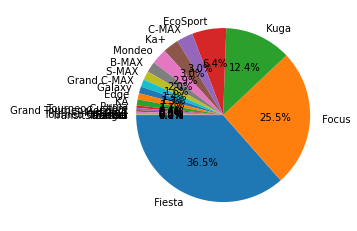

In [8]:
dF["model"].value_counts().plot(kind ="pie", 
                                       autopct = '%1.1f%%', 
                                       startangle = 180)
plt.ylabel("")
plt.show()

#### Barplot

In [9]:
# Pie chart isn't suitable if the data is grouped into too many subgroups.
# Especially, if some of the subgroups have a very small amount of contribution
# (%) they become unreadable. For example, the above pie chart represents the
# share of 23 models and the resulting congestion doesn't let one read beyond
# top 3 models. Let's see how a barplot does in such scenario.

dF_model = pd.DataFrame(dF["model"].value_counts())
dF_model = dF_model.reset_index() # resetting index
dF_model = dF_model.rename(columns={"model":"Number of cars", "index":"Model"}) # renaming columns
dF_model["% of cars"] = (dF_model["Number of cars"]/dF.shape[0])*100 # presenting each model's contribution as percentage
dF_model = dF_model.round(2) # rounding off the values to 2 decimal points

display(dF_model)

,Model,Number of cars,% of cars
0,Fiesta,6556,36.50
1,Focus,4588,25.54
2,Kuga,2225,12.39
3,EcoSport,1143,6.36
4,C-MAX,543,3.02
5,Ka+,531,2.96
6,Mondeo,526,2.93
7,B-MAX,355,1.98
8,S-MAX,296,1.65
9,Grand C-MAX,247,1.37


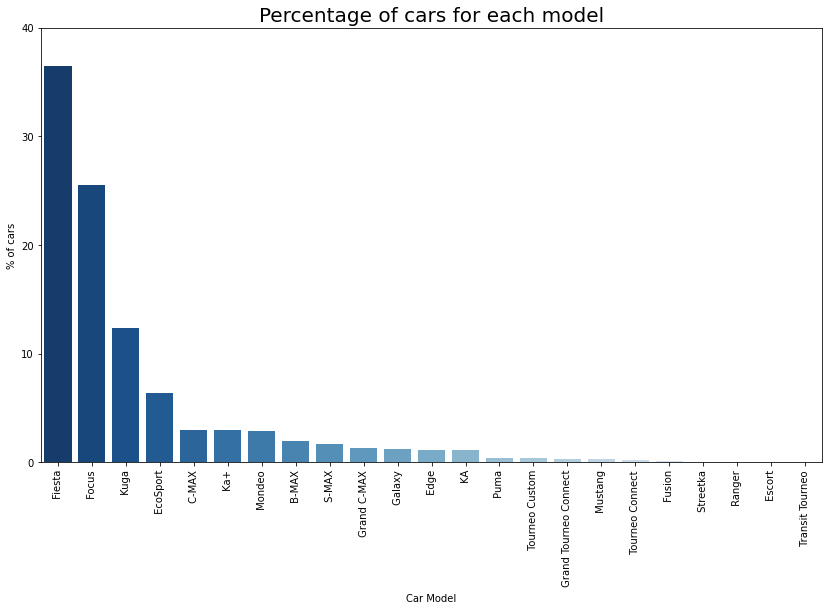

In [10]:
# Initialize the figure
f, ax = plt.subplots(figsize = (14, 8))


# Plot
sns.barplot(data = dF_model,
            x = "Model",
            y = "% of cars", 
            palette = "Blues_r")

# Labels & title
plt.xlabel("Car Model")
plt.ylabel("% of cars")
plt.title("Percentage of cars for each model", fontsize = 20)

locs, labels = plt.xticks()
plt.setp(labels, rotation = 90) # rotating the x-labels for better view
plt.yticks(np.arange(0,101,10))

# Shortening the y-axis for better view
ax.set(ylim = (0, 40))

plt.show()

#### Scatter plot #1

Text(0.5, 1.0, 'Price vs Mileage of Used Ford Cars')

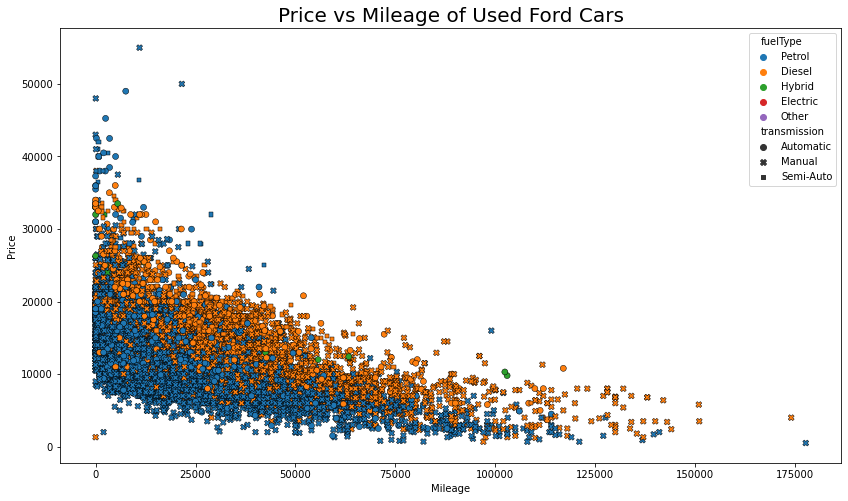

In [11]:
# Initialize the figure
f, ax = plt.subplots(figsize = (14, 8))

# Plot
sns.scatterplot(data = dF,
                x = "mileage",
                y = "price",
                hue = "fuelType",
                style = "transmission",
                edgecolor = "black")
# edgecolor helps identify the boundary of a data point

# Labels & title
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Price vs Mileage of Used Ford Cars", fontsize = 20)

#### Scatter plot #2

Text(0.5, 1.0, 'Year of Manufacture vs Price of Used Ford Cars')

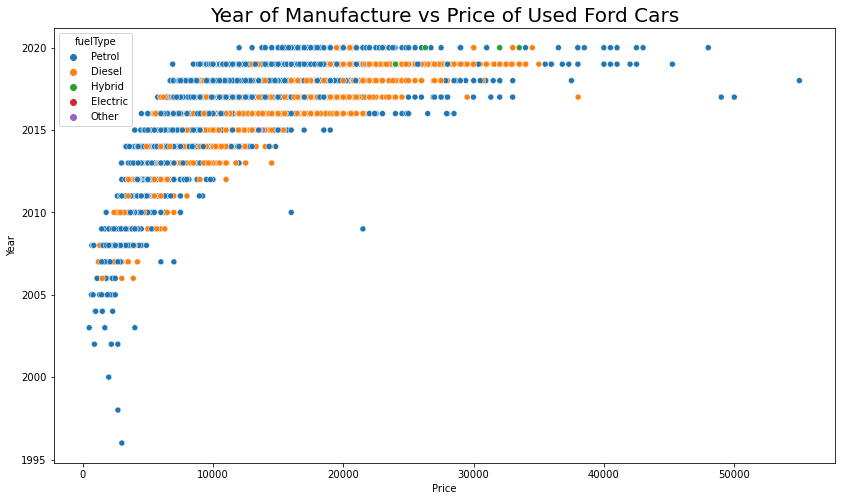

In [12]:
# Initialize the figure
f, ax = plt.subplots(figsize = (14, 8))

# Plot
sns.scatterplot(data = dF,
                y = "year",
                x = "price",
                hue = "fuelType")

# Labels & title
plt.xlabel("Price")
plt.ylabel("Year")
plt.title("Year of Manufacture vs Price of Used Ford Cars", fontsize = 20)

#### Linear regression plot #1

Text(0.5, 1.0, 'Price vs Mileage of Used Ford Cars')

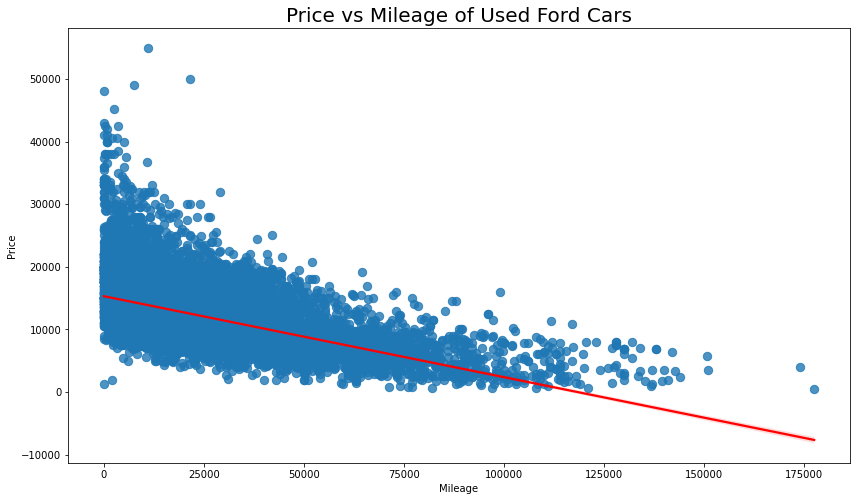

In [13]:
# Initialize the figure
f, ax = plt.subplots(figsize = (14, 8))

# Plot
sns.regplot(data = dF,
            x = "mileage",
            y = "price",
            scatter_kws = {'s':70},
            line_kws = {'color':'red'})

# Labels & title
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Price vs Mileage of Used Ford Cars", fontsize = 20)

#### Linear regression plot #2

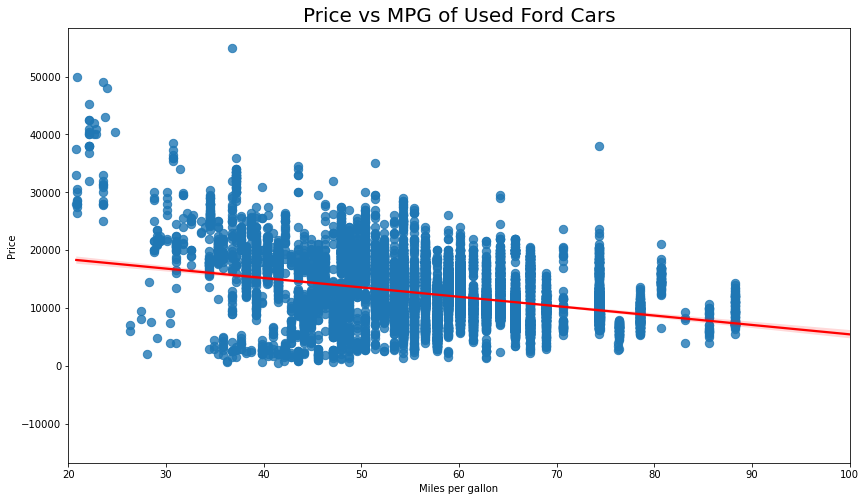

In [14]:
# Initialize the figure
f, ax = plt.subplots(figsize = (14, 8))

# Plot
sns.regplot(data = dF,
            x = "mpg",
            y = "price",
            scatter_kws = {'s':70},
            line_kws = {'color':'red'})

# Labels & title
plt.xlabel("Miles per gallon")
plt.ylabel("Price")
plt.title("Price vs MPG of Used Ford Cars", fontsize = 20)

# Shortening the x-axis for better view
ax.set(xlim = (20, 100))

plt.show()

#### Pairplot

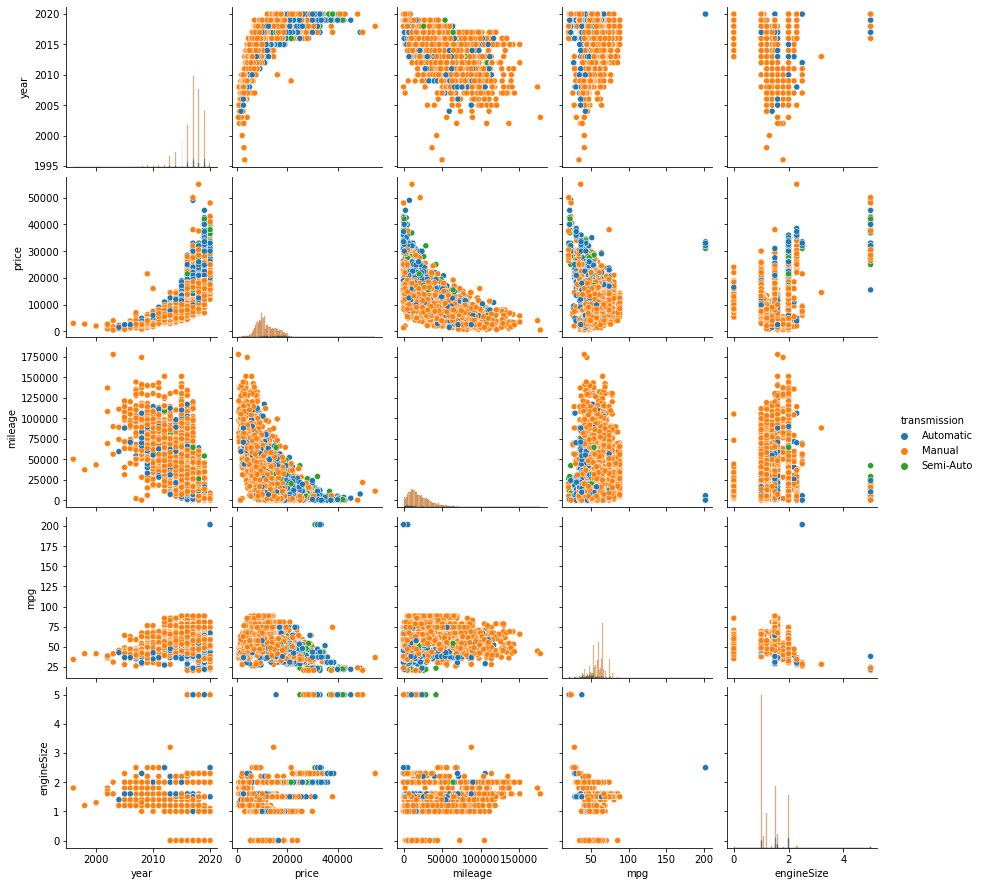

In [15]:
sns.pairplot(dF,
             hue = "transmission",
             diag_kind = "hist")

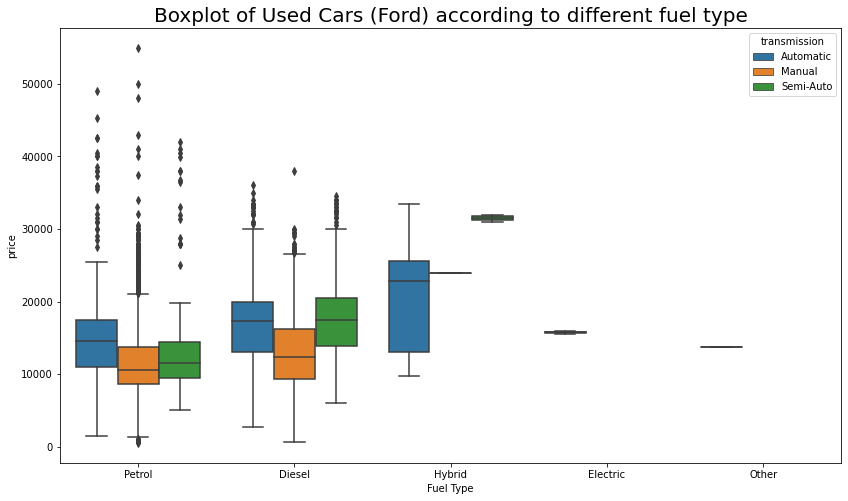

In [16]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 14, 8

# Plot
sns.boxplot(data = dF,
            x ="fuelType",
            y = "price",
            hue = "transmission")

# Labels & title
plt.xlabel("Fuel Type")
plt.title("Boxplot of Used Cars (Ford) according to different fuel type", fontsize = 20)

plt.show()

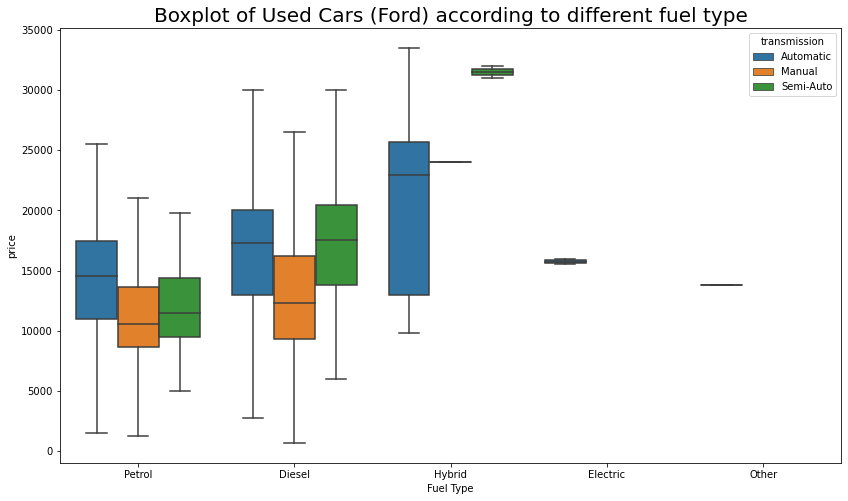

In [17]:
# The points beyond the maxima and minima are outliers. Removing the outliers
# will help understand the dataset better. We can do that by setting showfliers
# to False.

rcParams['figure.figsize'] = 14, 8

# Plot
sns.boxplot(data = dF,
            x ="fuelType",
            y = "price",
            hue = "transmission",
            showfliers = False)

# Labels & title
plt.xlabel("Fuel Type")
plt.title("Boxplot of Used Cars (Ford) according to different fuel type", fontsize = 20)

plt.show()

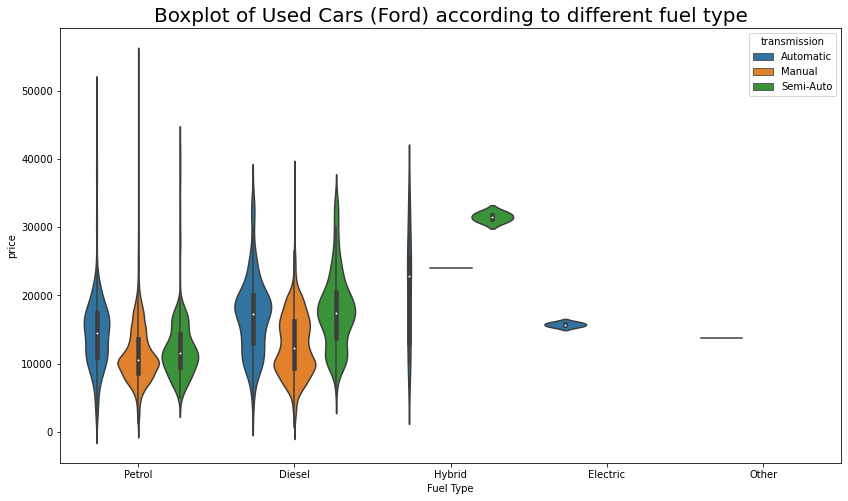

In [18]:
# Similarly, let's have generate a violin plot using the same x, y, hue

rcParams['figure.figsize'] = 14, 8

# Plot
sns.violinplot(data = dF,
            x ="fuelType",
            y = "price",
            hue = "transmission")

# Labels & title
plt.xlabel("Fuel Type")
plt.title("Boxplot of Used Cars (Ford) according to different fuel type", fontsize = 20)

plt.show()

While both box plot and violin plot have a lot of similarities, violin plot shows the distribution of the data which is entirely absent in the box plot. In particular, this is 

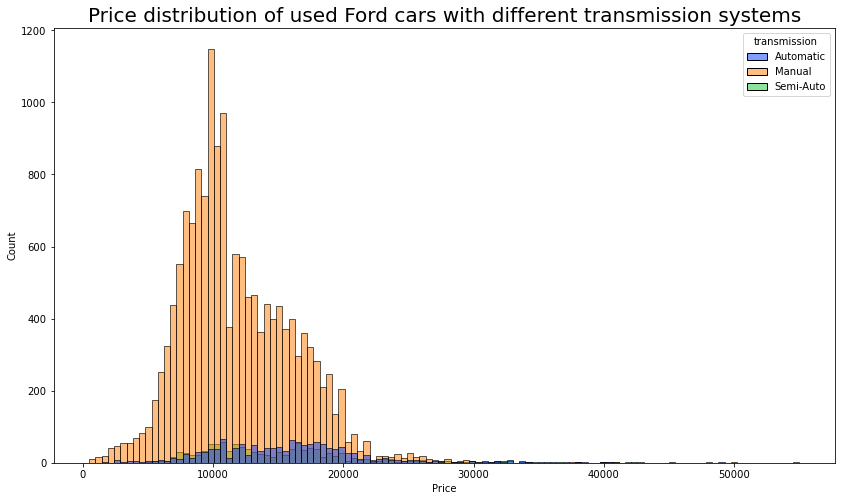

In [19]:
sns.color_palette("rocket")
rcParams['figure.figsize'] = 14, 8

# Plot
sns.histplot(data = dF,
             x = "price",
             hue = "transmission",
             edgecolor = "black",
             palette = "bright")

# Labels & title
plt.xlabel("Price")
plt.title("Price distribution of used Ford cars with different transmission systems", fontsize = 20)

plt.show()

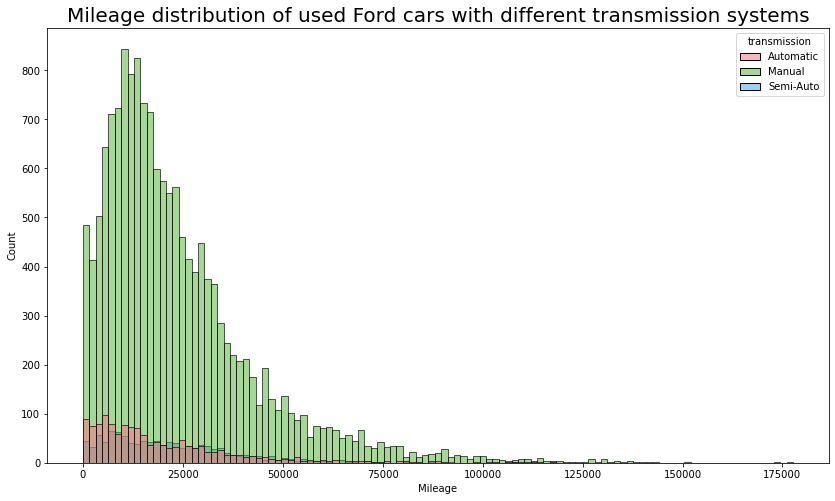

In [20]:
rcParams['figure.figsize'] = 14, 8

# Plot
sns.histplot(data = dF,
             x = "mileage",
             hue = "transmission",
             edgecolor = "black",
             palette = "husl")

# Labels & title
plt.xlabel("Mileage")
plt.title("Mileage distribution of used Ford cars with different transmission systems", fontsize = 20)

sns.color_palette("magma")

plt.show()